In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from haversine import haversine

### haversine 기준 거리: 412.84 / 실제 도보 거리: 424m 
- 0.03정도 실제 도보 거리가 더 측정, 측정하려는 거리가 멀어질수록 더 커짐 but maximum 서울-부산 기준: 0.2정도 더 측정

In [8]:
haversine((37.548858,126.836314), (37.546757,126.840175),unit='m')

412.8467330287913

In [20]:
data = pd.read_excel("종로구 실거래(13~18).xlsx",index_col=0)
school = pd.read_excel("서울 초중등학교 위치.xls",index_col=0)
subway = pd.read_excel("서울특별시 지하철.xlsx",index_col=0)

In [22]:
data_all = pd.read_excel("종로구 실거래 최종변수.xlsx",index_col=0)

In [24]:
data_all['price'] = data_all.price.str.replace(',','').astype('int64')

In [25]:
data_all.head(3)

,price,C_year,year,month,day,size,floor,lat,lng,D_hsch,D_msch,D_esch,D_sub,D_trans,E_GDP,E_grow,E_CPI,E_rent,E_rate,brand
0,115000,2008,2013,1,2,153.42,9,37.573480,126.967792,0,0,0,0,0,"355,385",2.3,1.6,3.1,"1,071.10",0
1,119000,2008,2013,1,20,131.44,6,37.574382,126.968851,0,0,0,0,0,"355,385",2.3,1.6,3.1,"1,056.10",0
2,33000,2005,2013,1,4,39.67,8,37.574975,126.981219,1,0,0,0,0,"355,385",2.3,1.6,3.1,"1,063.80",0


# 1) haversine 거리 기준 역과의 거리가 300m 이내인 경우 

In [50]:
D_sub_list = []
D_trans_list = []

for i in range(len(data_all)):
    if data_all['D_trans'][i] == 1:
        D_trans_list.append(data_all['price'][i])
D_trans_df = pd.DataFrame({'price':D_trans_list})

for j in range(len(data_all)):
    if data_all['D_sub'][j] == 1:
        D_sub_list.append(data_all['price'][j])
D_sub_df = pd.DataFrame({'price': D_sub_list})

In [91]:
D_trans_df.tail(1)

,price
441,12400


In [92]:
D_sub_df.tail(1)

,price
1959,96490


Text(0, 0.5, 'Price')

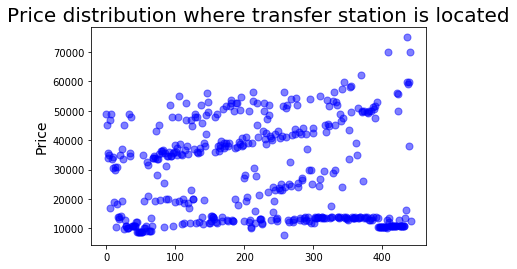

In [66]:
plt.plot('price',data=D_trans_df,linestyle='none',marker='o',markersize=7,color='blue',alpha=0.5)
plt.title('Price distribution where transfer station is located', fontsize=20)
plt.ylabel('Price', fontsize=14)

Text(0, 0.5, 'Price')

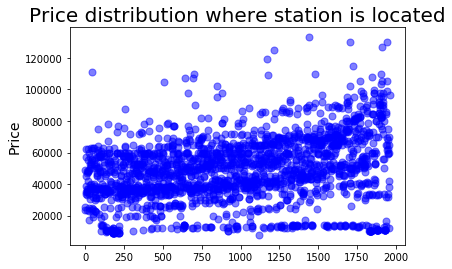

In [71]:
plt.plot('price',data=D_sub_df,linestyle='none',marker='o',markersize=7,color='blue',alpha=0.5)
plt.title('Price distribution where station is located', fontsize=20)
plt.ylabel('Price', fontsize=14)

# 2) haversine 거리 기준 역과의 거리가 500m 이내인 경우 

In [72]:
data['D_sub'] = ''
data['D_trans'] = ''

In [73]:
# 지하철 변수 생성
a = (data['lat'].values, data['lng'].values)
b = (subway['위도'].values, subway['경도'].values)
c = subway['환승역'].values

for i in range(len(data)):
    x = 0
    y = 0
    for j in range(len(subway)):
        if(haversine((a[0][i],a[1][i]), (b[0][j],b[1][j]), unit = 'm') < 500):
            x = x + 1
            y += c[j]
    data.at[i,'D_sub'] = x
    data.at[i,'D_trans'] = y
    
data.drop(['location','lat','lng'], axis = 1, inplace=True)ㅠ

In [82]:
data = data.rename(columns={"거래금액":"price"})

In [84]:
data['price']=data.price.str.replace(',','').astype('int64')

In [85]:
D_sub_list2 = []
D_trans_list2 = []

for i in range(len(data)):
    if data['D_trans'][i] == 1: # 환승역이 있다. 
        D_trans_list2.append(data['price'][i])
D_trans_df2 = pd.DataFrame({'price':D_trans_list2}) # 환승역이 있는 매매가를 따로 분리 

for j in range(len(data_all)):
    if data['D_sub'][j] == 1: # 역이 있다. 
        D_sub_list2.append(data['price'][j])
D_sub_df2 = pd.DataFrame({'price': D_sub_list2}) #역이 있는 매매가를 따로 분리 

Text(0, 0.5, 'Price')

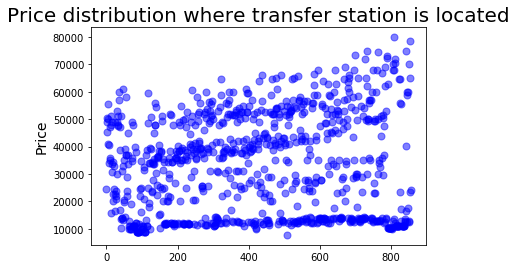

In [86]:
plt.plot('price',data=D_trans_df2,linestyle='none',marker='o',markersize=7,color='blue',alpha=0.5)
plt.title('Price distribution where transfer station is located', fontsize=20)
plt.ylabel('Price', fontsize=14)

Text(0, 0.5, 'Price')

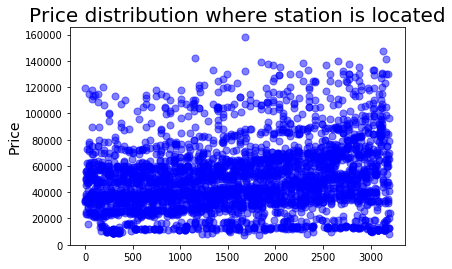

In [87]:
plt.plot('price',data=D_sub_df2,linestyle='none',marker='o',markersize=7,color='blue',alpha=0.5)
plt.title('Price distribution where station is located', fontsize=20)
plt.ylabel('Price', fontsize=14)

# 결론: 300m일 때보다 매물 수가 두배 증가
## 환승역 441 역 1959 -> 885 / 3200

In [142]:
data['price'].corr(data['D_sub'])

-0.15744545078779482

In [143]:
data['price'].corr(data['D_trans'])

-0.3667238453143628

# 결론: 300m 일 때, 500m 일 때 price와의 상관관계 분석 비교
## 300m 일 때 : D_sub -0.103739, D_trans -0.256309
## 500m 일 때 : D_sub -0.157445, D_trans -0.366723